# Calibration

For the currently used values, skip to [Au calibration](#au-calibration)

- [Au calibration](#au-calibration)
  - [120 cm](#120-cm)
  - [150 cm](#150-cm)
  - [200 cm](#200-cm)

In [1]:
%matplotlib widget

import numpy as np
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt

import hyperspy.api as hs
import pyxem as pxm

In [9]:
folder = './'
file = 'Si_4.hspy'

In [ ]:
s_200 = hs.load(folder+file)

In [ ]:
s_200

<Signal2D, title: , dimensions: (|512, 512)>

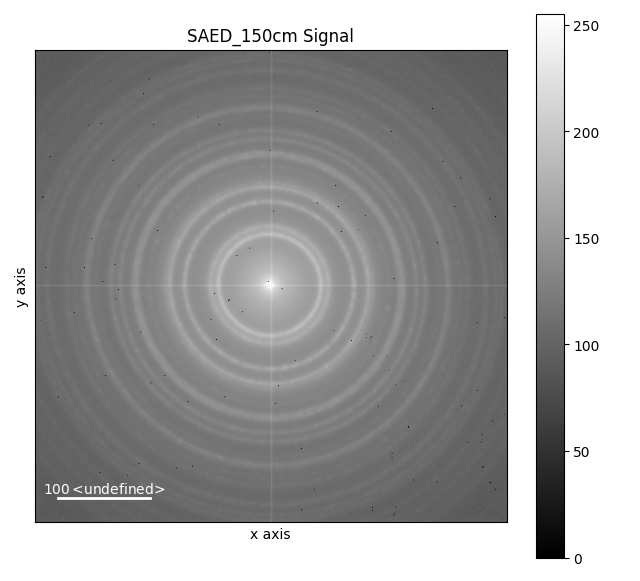

In [ ]:
s_200.plot()

In [ ]:
s_200.find_peaks(method='laplacian_of_gaussian', min_sigma=2., max_sigma=10., num_sigma=20, threshold=0.0005, overlap=1.0,
              log_scale=False, exclude_border=1, interactive=True)

<BaseSignal, title: , dimensions: (239|)>

# Calibration

## Possibly [112]?

In [ ]:
image = s_200.inav[75]
image.plot(norm='log', cmap='magma_r')
line = hs.roi.Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=3)
profile = line.interactive(image)
profile.plot(norm='log')

In [11]:
line

Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=0)

In [14]:
span = hs.roi.SpanROI(left=19.3554, right=185.117)
L = span.interactive(profile)

In [13]:
span

SpanROI(left=19.3554, right=185.117)

In [ ]:
num_peaks = 6
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 5.4307 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.009549014634313803


In [ ]:
image = s_200.inav[75]
image.plot(norm='log', cmap='magma_r')
line = hs.roi.Line2DROI(x1=124, y1=370, x2=335, y2=260, linewidth=3)
profile = line.interactive(image)
profile.plot(norm='log')

In [17]:
line

Line2DROI(x1=124, y1=370, x2=335, y2=260, linewidth=3)

In [22]:
span = hs.roi.SpanROI(left=9.45833, right=228.493)
L = span.interactive(profile)

In [23]:
span

SpanROI(left=9.45833, right=228.493)

In [ ]:
num_peaks = 5
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 2, 2, 0
a = 5.4307 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.009469487860249695


## Possibly [111] row?

In [ ]:
image = s_200.inav[150]
image.plot(norm='log', cmap='magma_r')
line = hs.roi.Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=3)
profile = line.interactive(image)
profile.plot(norm='log')

In [11]:
line

Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=0)

In [14]:
span = hs.roi.SpanROI(left=19.3554, right=185.117)
L = span.interactive(profile)

In [13]:
span

SpanROI(left=19.3554, right=185.117)

In [ ]:
num_peaks = 6
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 5.4307 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.009549014634313803


## Possibly [111] row?

In [ ]:
image = s_200.inav[211]
image.plot(norm='log', cmap='magma_r')
line = hs.roi.Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=3)
profile = line.interactive(image)
profile.plot(norm='log')

In [11]:
line

Line2DROI(x1=159, y1=179, x2=256, y2=359, linewidth=0)

In [14]:
span = hs.roi.SpanROI(left=19.3554, right=185.117)
L = span.interactive(profile)

In [13]:
span

SpanROI(left=19.3554, right=185.117)

In [ ]:
num_peaks = 6
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 5.4307 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.009549014634313803


# Au calibration

In [2]:
%matplotlib widget

import hyperspy.api as hs
import numpy as np

from hyperspy._signals.signal1d import BaseSignal
from hyperspy._signals.signal2d import Signal2D
from hyperspy.roi import Line2DROI

In [ ]:
import hyperspy.roi
def reverse_calibrate(dataset, calibration, cx=256, cy=256):
    """Plot a circle of the 111 reflection according to the given calibration constant"""
    h, k, l = 1, 1, 1
    a = 3.901 # Å
    d = a/np.sqrt((h**2 + k**2 + l**2))
    r = 1/(calibration * d)
    circ = hyperspy.roi.CircleROI(cx=cx, cy=cy, r=r)
    circ.interactive(dataset)
    return circ

## 120 cm

In [3]:
folder = "/home/iverks/progging/master/zeolite_data/Au_calibration/"
file = 'SAED_120cm.png'

s_120 = hs.load(folder + file)

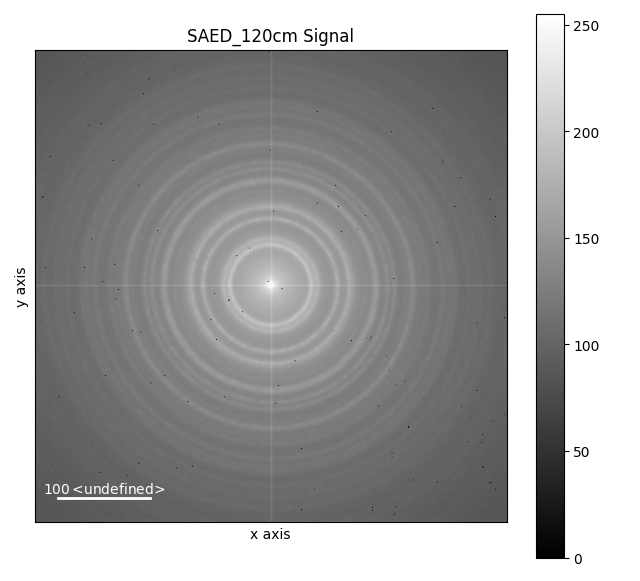

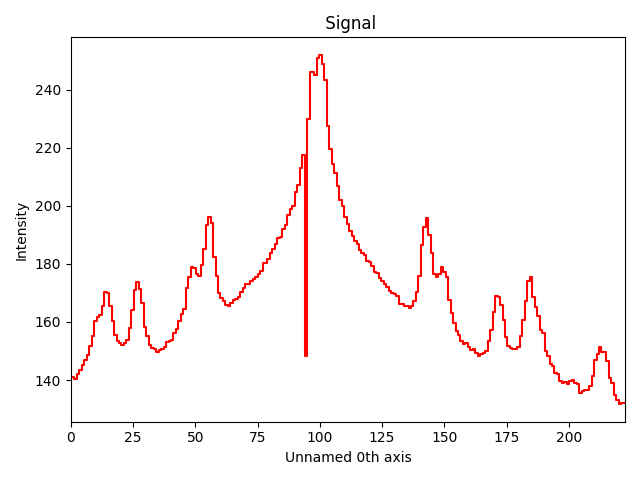

In [10]:
s_120.plot()
line = hs.roi.Line2DROI(x1=199, y1=172, x2=326, y2=356, linewidth=3)
profile = line.interactive(s_120)
profile.plot()

In [6]:
line

Line2DROI(x1=199, y1=172, x2=326, y2=356, linewidth=3)

In [13]:
span = hs.roi.SpanROI(left=56.1417, right=142.59)
L = span.interactive(profile)

In [12]:
span

SpanROI(left=56.1417, right=142.59)

In [16]:
num_peaks = 3
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 3.901 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scalte = (num_peaks-1)/(r*d)
print(scalte)

0.010206939615939246


## 150 cm

In [52]:
folder = "/home/iverks/progging/master/zeolite_data/Au_calibration/"
file = 'SAED_150cm.png'

s_150 = hs.load(folder + file)

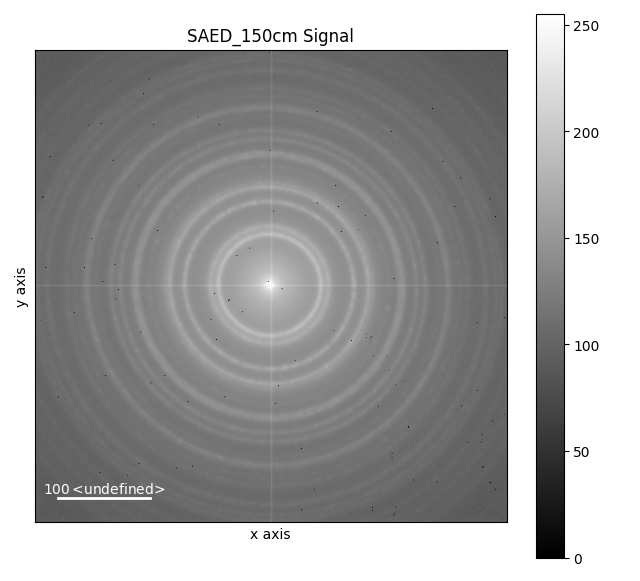

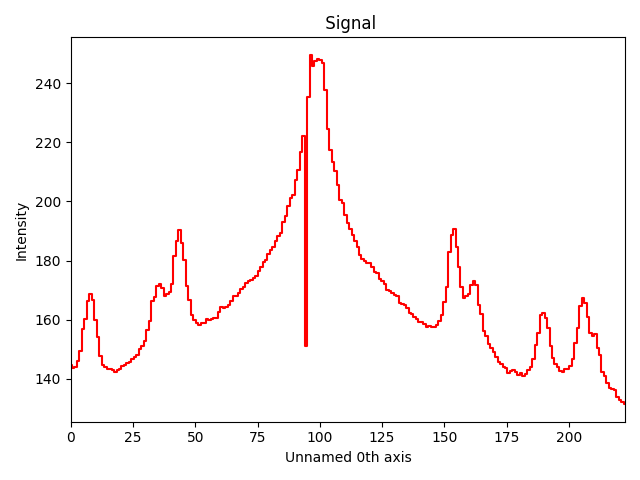

In [53]:
s_150.plot()
line = hs.roi.Line2DROI(x1=199, y1=172, x2=326, y2=356, linewidth=3)
profile = line.interactive(s_150)
profile.plot()

In [54]:
line

Line2DROI(x1=199, y1=172, x2=326, y2=356, linewidth=3)

In [55]:
span = hs.roi.SpanROI(left=42.2305, right=155.508)
L = span.interactive(profile)

In [56]:
span

SpanROI(left=42.2305, right=155.508)

In [57]:
num_peaks = 3
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 3.901 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.007789477857479205


## 200 cm

In [26]:
folder = "/home/iverks/progging/master/zeolite_data/Au_calibration/"
file = 'SAED_200cm.png'

s_200 = hs.load(folder + file)

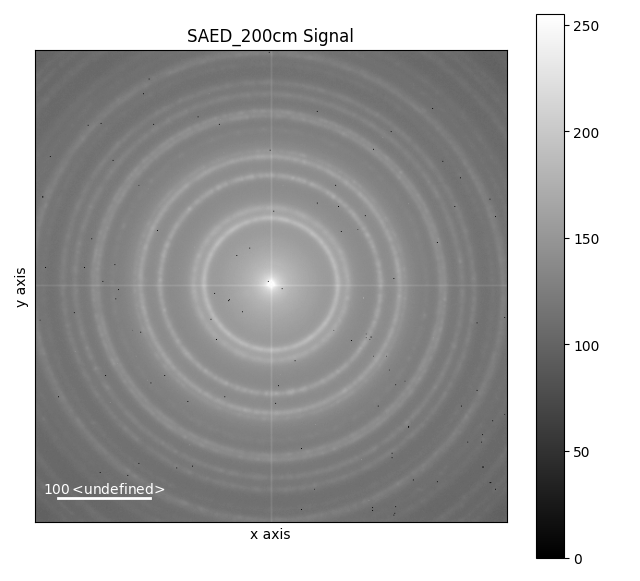

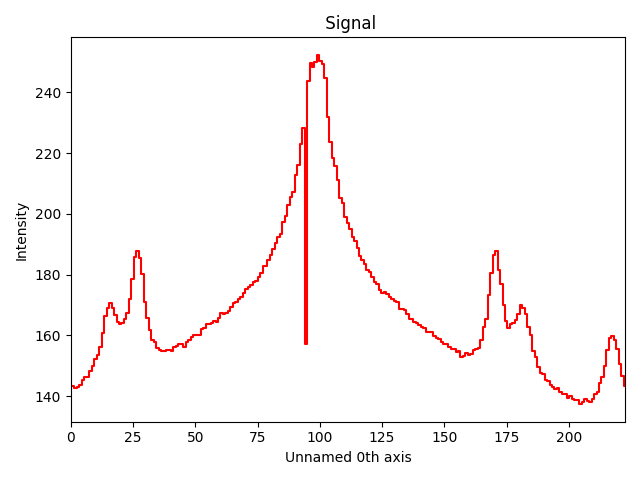

In [27]:
s_200.plot()
line = hs.roi.Line2DROI(x1=199, y1=172, x2=326, y2=356, linewidth=3)
profile = line.interactive(s_200)
profile.plot()

In [31]:
span = hs.roi.SpanROI(left=27.3256, right=170.413)
L = span.interactive(profile)

In [30]:
span

SpanROI(left=27.3256, right=170.413)

In [ ]:
num_peaks = 3
r = (span.right - span.left) / profile.axes_manager[0].scale
h, k, l = 1, 1, 1
a = 3.901 # Å
d = a/np.sqrt((h**2 + k**2 + l**2))
scale = (num_peaks-1)/(r*d)
print(scale)

0.006166668609539349


## 2 pixel central cross correction

### 150 cm

### 200 cm

In [ ]:
folder = "/home/iverks/progging/master/zeolite_data/Au_calibration/"
file = 'SAED_200cm.png'

s_200: Signal2D = hs.load(folder + file)
image = s_200.data
# insert two cols and two rows before col/row 256
image = np.insert(image, 256, image[256, :], axis=0)
image = np.insert(image, 256, image[252, :], axis=0)
image = np.insert(image, 256, image[:, 256], axis=1)
image = np.insert(image, 256, image[:, 255], axis=1)
s_200.data = image
s_200.data.shape

(514, 514)

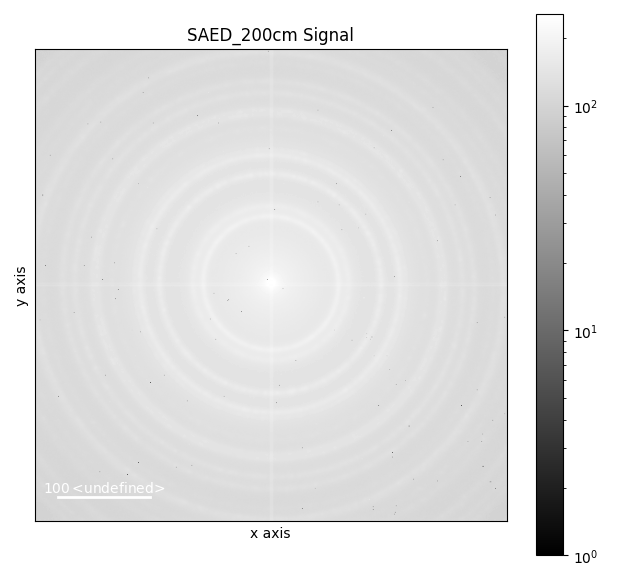

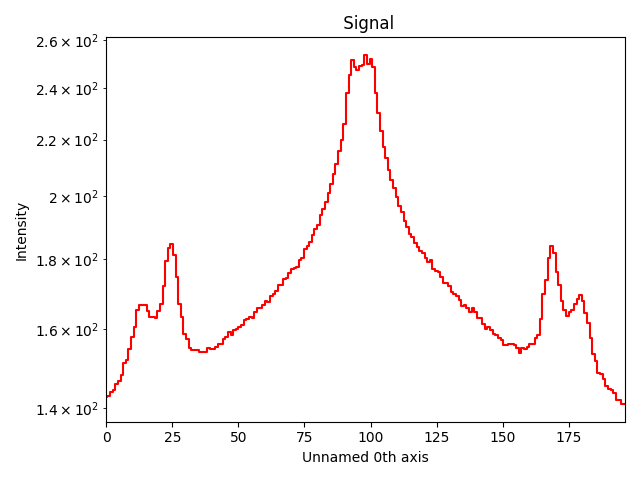

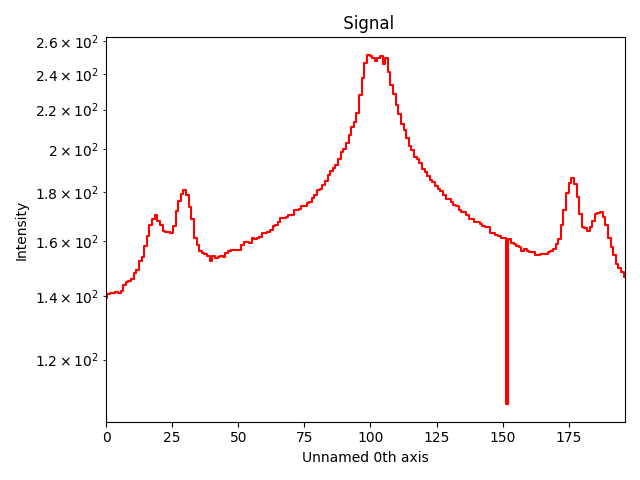

In [30]:
s_200.plot(norm="log")
line_a = Line2DROI(x1=179, y1=314, x2=337, y2=196, linewidth=3)
profile_a: BaseSignal = line_a.interactive(s_200)
profile_a.plot(norm="log")
line_b = Line2DROI(x1=328, y1=329, x2=187, y2=191, linewidth=3)
profile_b: BaseSignal = line_b.interactive(s_200)
profile_b.plot(norm="log")

In [29]:
line_a, line_b

(Line2DROI(x1=179, y1=314, x2=337, y2=196, linewidth=3),
 Line2DROI(x1=328, y1=329, x2=187, y2=191, linewidth=3))

In [34]:
span_a = hs.roi.SpanROI(left=24.2784, right=167.967)
span_a.interactive(profile_a)
span_b = hs.roi.SpanROI(left=30.2386, right=176.97)
span_b.interactive(profile_b)

<BaseSignal, title: , dimensions: (|148)>

In [35]:
span_a, span_b

(SpanROI(left=24.2784, right=167.967), SpanROI(left=30.2386, right=176.97))

In [37]:
def scale(span, profile):
    num_peaks = 3
    r = (span.right - span.left) / profile.axes_manager[0].scale
    h, k, l = 1, 1, 1
    a = 3.901 # Å
    d = a/np.sqrt((h**2 + k**2 + l**2))
    scale = (num_peaks-1)/(r*d)
    return scale
print((scale(span_a, profile_a) + scale(span_b, profile_b))/ 2)

0.006062094957046152


## 4 pixel central cross correction

### 150 cm

In [1]:
folder = "/home/iverks/progging/master/zeolite_data/Au_calibration/"
file = 'WIDE_150cm.tiff'

s_150: Signal2D = hs.load(folder + file)

NameError: name 'hs' is not defined

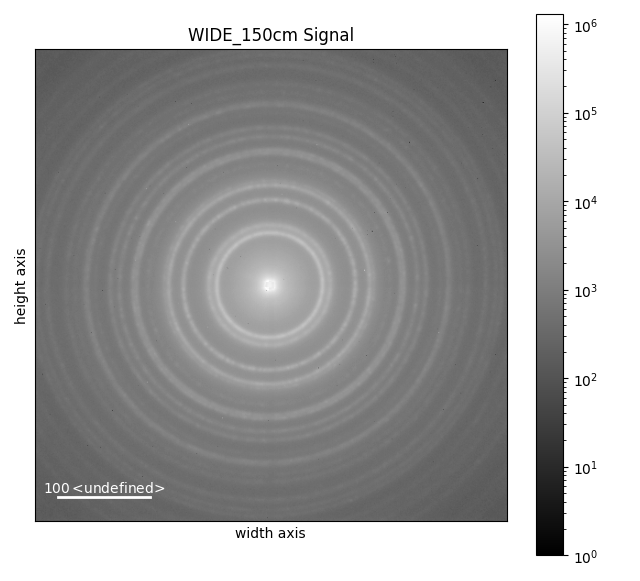

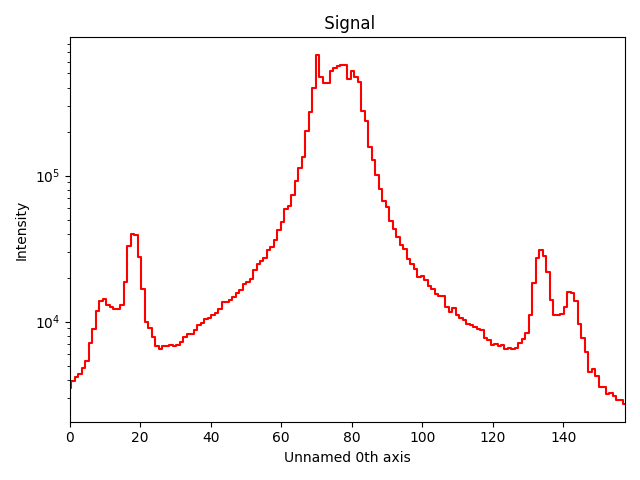

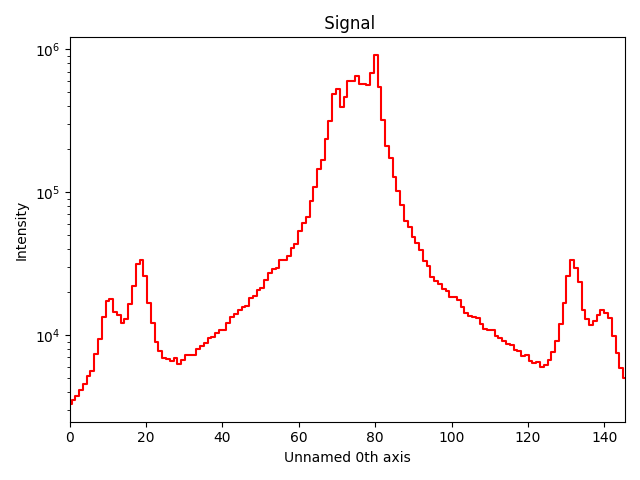

In [ ]:
s_150.plot(norm="log")
line_a = Line2DROI(x1=195, y1=305, x2=318, y2=205, linewidth=3)
profile_a: BaseSignal = line_a.interactive(s_150)
profile_a.plot(norm="log")
line_b = Line2DROI(x1=287, y1=327, x2=228, y2=193, linewidth=3)
profile_b: BaseSignal = line_b.interactive(s_150)
profile_b.plot(norm="log")

In [ ]:
line_a, line_b

(Line2DROI(x1=195, y1=305, x2=318, y2=205, linewidth=3),
 Line2DROI(x1=287, y1=327, x2=228, y2=193, linewidth=3))

In [ ]:
span_a = hs.roi.SpanROI(left=18.329, right=133.257)
span_a.interactive(profile_a)
span_b = hs.roi.SpanROI(left=18.3017, right=132.069)
span_b.interactive(profile_b)

<BaseSignal, title: , dimensions: (|115)>

In [ ]:
span_a, span_b

(SpanROI(left=18.329, right=133.257),
 SpanROI(left=18.3017, right=132.069),
 <BaseSignal, title: , dimensions: (|117)>)

In [ ]:
def scale(span):
    num_peaks = 3
    r = (span.right - span.left) / profile.axes_manager[0].scale
    h, k, l = 1, 1, 1
    a = 3.901 # Å
    d = a/np.sqrt((h**2 + k**2 + l**2))
    scale = (num_peaks-1)/(r*d)
    return scale
print((scale(span_a) + scale(span_b))/ 2)

0.007681671695823619
